## User Overview Analysis of Tellco Telecommunications

#### Tables of Content

<html>
    <ul>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#obj'>Objective</a></li>
        <li><a href= '#research'/>Research Questions<a/></li>
              <br/>
            <ul>
             <li><a href='#fe'>Feature Engineering</a></li>
             </ul>
            <ol>
            <li><a href='#r1'>Research Question 1</a></li>
             <li><a href='#r2'>Research Question 2</a></li>
             <li><a href='#r3'>Research Question 3</a></li>
            </ol>
        <br/>
        <li><a href= '#ana'>Analysis<a/></li>
        <li><a href= '#go'>General Observation<a/></li>
        <li><a href= '#rc'>Recommendation & Conclusions<a/></li>
        <li><a href= '#lim'>Limitations<a/></li>
        <li><a href= '#ref'>Referecnes<a/></li>
    </ul>
</html>

<a id='intro'></a>
#### Introduction


<a id='obj'></a>
#### Objective

<a id='research'></a>

#### Research Questions

 - Research Question 1
 
     - Top performers
 
          - Who/What are the top tiers accros manufacturers, handsets and customers
          
          - What group of users belong each to the top 5 decile classes based on the total duration for all sessions
          
   
  
 -  Research Question 2
 
       - User Behaviour in xDR sessions
 
         - What inisghts can be gooten from user behaviour accross the xDR sessions (Data Channel)
  
  
 -  Research Question 3
 
      - Siginificant Relationships 
 
          - Are  there an existing significant relationship across
          
              1. each application & the total DL+UL data
          
              2. the various xDR sessions (Google,Youtbe,Netflix, etc.)
              
              
              
        
 
     


import libraries

In [591]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Load data into workspace

In [592]:
path = '../datasets/cleaned/cleanWk2_data.csv'
data = pd.read_csv(path)

In [593]:
data

,bearer_id,start,start_ms,end,end_ms,imsi,msisdn_number,imei,last_location_name,avg_rtt_dl__ms_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0000,2019-04-30 06:02:33,214.00000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.000000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,2019-04-29 07:28:42,483.0000,2019-04-30 10:41:33,187.00000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.000000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0000,2019-04-30 10:46:12,810.00000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.000000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0000,2019-04-30 10:40:34,327.00000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.000000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [594]:
data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'imsi',
       'msisdn_number', 'imei', 'last_location_name', 'avg_rtt_dl__ms_',
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',
       'dl_tp_<_50_kbps__%_', '50_kbps_<_dl_tp_<_250_kbps__%_',
       '250_kbps_<_dl_tp_<_1_mbps__%_', 'dl_tp_>_1_mbps__%_',
       'ul_tp_<_10_kbps__%_', '10_kbps_<_ul_tp_<_50_kbps__%_',
       '50_kbps_<_ul_tp_<_300_kbps__%_', 'ul_tp_>_300_kbps__%_',
       'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of

#### Feature Engineering
 - For this analyis, we would be working with the following features

In [595]:
columns = ['bearer_id', 'dur___ms__1','http_dl__bytes_',
           'http_ul__bytes_', 'activity_duration_dl__ms_',
           'activity_duration_ul__ms_',
           'handset_manufacturer', 'handset_type',
          'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_']

In [596]:
data2 = data[columns]

In [597]:
data2

,bearer_id,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,handset_manufacturer,handset_type,social_media_dl__bytes_,social_media_ul__bytes_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,1.823653e+09,1.144710e+08,3.242301e+06,3.762400e+04,3.878700e+04,samsung,samsung galaxy a5 sm-a520f,1.545765e+06,24420.00000,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,1.365104e+09,1.144710e+08,3.242301e+06,1.680000e+02,3.560000e+03,samsung,samsung galaxy j5 (sm-j530),1.926113e+06,7165.00000,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,1.361763e+09,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,samsung,samsung galaxy a8 (2018),1.684053e+06,42224.00000,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,1.321510e+09,1.144710e+08,3.242301e+06,3.330000e+03,3.788200e+04,undefined,undefined,6.441210e+05,13372.00000,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,1.089009e+09,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,samsung,samsung sm-g390f,8.626000e+05,50188.00000,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,8.123076e+07,1.144710e+08,3.242301e+06,4.237600e+04,4.191500e+04,apple,apple iphone 8 plus (a1897),3.464974e+06,52091.00000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,9.797070e+07,1.144710e+08,3.242301e+06,1.726400e+04,1.675900e+04,apple,apple iphone se (a1723),2.344568e+06,7613.00000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,9.824953e+07,1.144710e+08,3.242301e+06,2.500300e+04,2.864000e+04,apple,apple iphone xs (a2097),1.245845e+06,14394.00000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,9.791063e+07,1.144710e+08,3.242301e+06,1.340500e+04,3.408800e+04,huawei,huawei fig-lx1,8.015470e+05,21562.00000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [598]:
data2.columns

Index(['bearer_id', 'dur___ms__1', 'http_dl__bytes_', 'http_ul__bytes_',
       'activity_duration_dl__ms_', 'activity_duration_ul__ms_',
       'handset_manufacturer', 'handset_type', 'social_media_dl__bytes_',
       'social_media_ul__bytes_', 'google_dl__bytes_', 'google_ul__bytes_',
       'email_dl__bytes_', 'email_ul__bytes_', 'youtube_dl__bytes_',
       'youtube_ul__bytes_', 'netflix_dl__bytes_', 'netflix_ul__bytes_',
       'gaming_dl__bytes_', 'gaming_ul__bytes_', 'other_dl__bytes_',
       'other_ul__bytes_', 'total_ul__bytes_', 'total_dl__bytes_'],
      dtype='object')

<a id='r1'></a>

#### Research Question 1

  - Top performers
 
       - Who/What are the top tiers accros manufacturers, handsets and customers
          
       - What group of users belong each to the top 5 decile classes based on the total duration for all sessions

#### Who/What are the top tiers accros manufacturers, handsets and customers
 

 ##### A
 
 In answering these, we would focus on identifying the following:

- top 10 handsets used by the customers.

- top 3 handset manufacturers

- top 5 handsets per handset manufacturer

> top 10 handsets used by the customers

In [599]:
top10_handests = data2.groupby('handset_type')['bearer_id'].count().reset_index().sort_values('bearer_id', ascending=False).head(10)

In [600]:
top10_handests.rename(columns={'handset_type': 'Handset_Type', 'bearer_id':'Customer_Count'}, inplace=True)

In [601]:
top10_handests

,Handset_Type,Customer_Count
316,huawei b528s-23a,20324
53,apple iphone 6s (a1688),9419
49,apple iphone 6 (a1586),9023
1247,undefined,8987
59,apple iphone 7 (a1778),6326
73,apple iphone se (a1723),5187
66,apple iphone 8 (a1905),4993
78,apple iphone xr (a2105),4568
955,samsung galaxy s8 (sm-g950f),4520
75,apple iphone x (a1901),3813


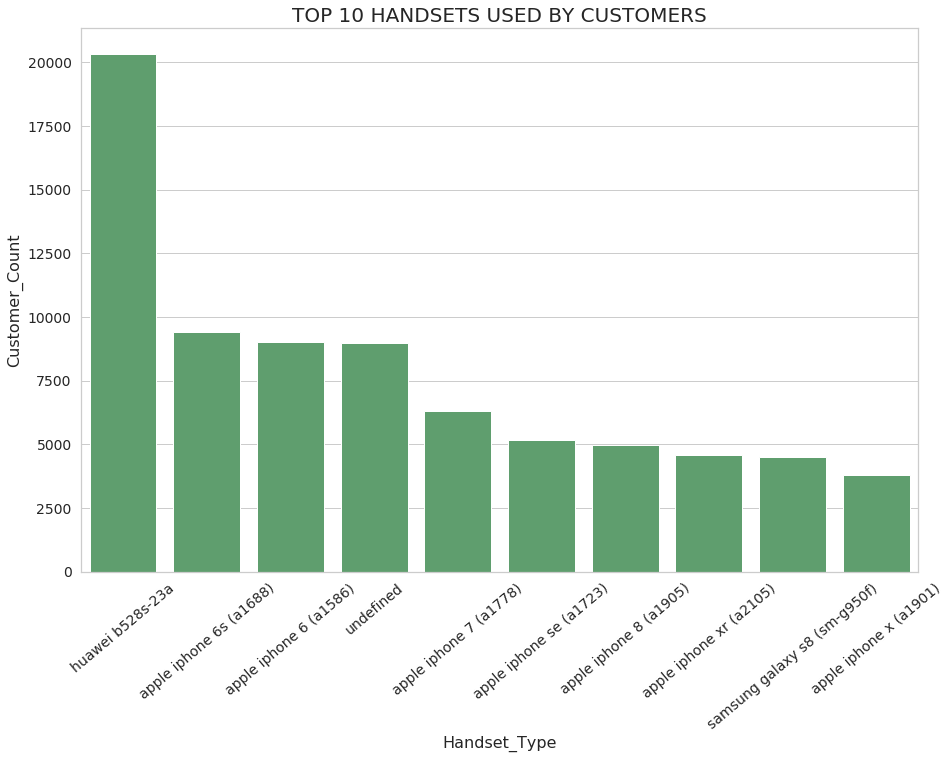

In [602]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Customer_Count', fontsize=16)
plt.ylabel('Cust', fontsize=16)
plt.title('TOP 10 HANDSETS USED BY CUSTOMERS', fontsize=20)
sns.barplot(x='Handset_Type', y= 'Customer_Count', data=top10_handests, color='g')
# save chart
plt.savefig(fname='visuals/top10Hansets.png', format='png')
plt.show()

- Observation

> From the above we can deduce the folowing:

    1. Smart Phones are the most popularly used phones 
    
    2. Huawei phone specifically brand (_Huawei B528S-23A_) have the largest purchase
    
    3. Apple phone brands is the most popular (and possibly have the highest market share)

> top 3 handset manufacturers

In [603]:
top3_man = data2.groupby('handset_manufacturer')['bearer_id'].count().reset_index().sort_values('bearer_id', ascending=False).head(3)

In [604]:
top3_man.rename(columns={'handset_manufacturer': 'Manufacturer', 'bearer_id':'Customer_Count'}, inplace=True)

In [605]:
top3_man

,Manufacturer,Customer_Count
4,apple,60137
93,samsung,40839
46,huawei,34423


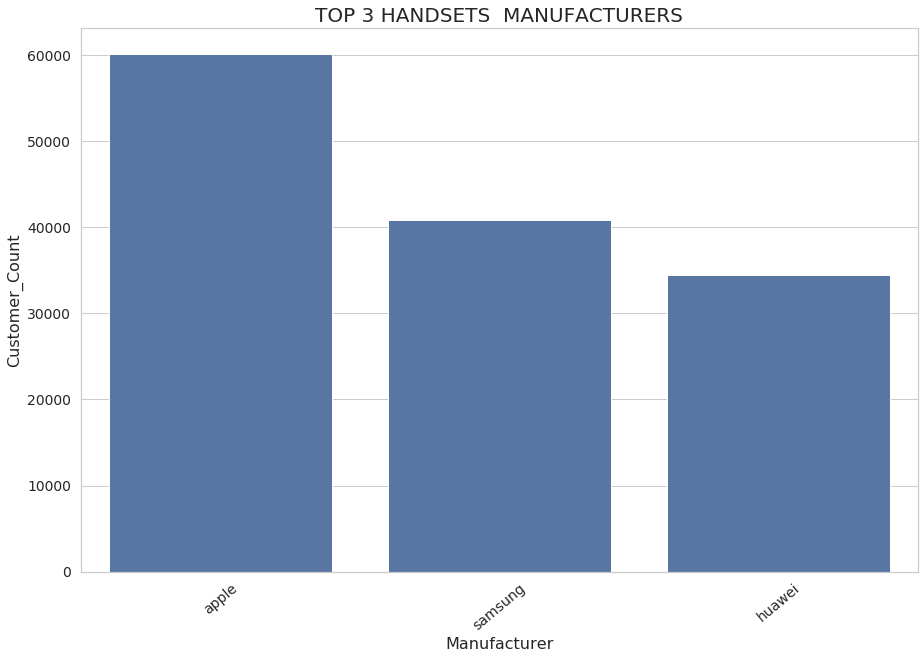

In [606]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Manufacturer', fontsize=16)
plt.ylabel('Cust', fontsize=16)
plt.title('TOP 3 HANDSETS  MANUFACTURERS', fontsize=20)
sns.barplot(x='Manufacturer', y= 'Customer_Count', data=top3_man, color='b')
plt.savefig(fname='visuals/top3Man.png', format='png')
plt.show()

- Observation

> From the above we can deduce the folowing:

    1. Smart Phones are the most popularly used phones 
    
    2. Huawei phone specifically brand (_Huawei B528S-23A_) have the largest purchase
    
    3. Apple phone brands is the most popular (and possibly have the highest market share)

> top 5 handsets per handset manufacturer

In [607]:
top5Hands_man = data2.groupby(['handset_manufacturer','handset_type'])['handset_type'].count()

In [608]:
top5Hands_man

handset_manufacturer                     handset_type                                                                       
a-link telecom international co limited  a-link telecom i. cubot a5                                                             1
                                         a-link telecom i. cubot note plus                                                      1
                                         a-link telecom i. cubot note s                                                         1
                                         a-link telecom i. cubot nova                                                           1
                                         a-link telecom i. cubot power                                                          1
                                                                                                                               ..
zte                                      zte starxtrem by sfr                                  

In [609]:
top5Hands_man=top5Hands_man.reset_index(name='count')

In [610]:
top5Hands_man

,handset_manufacturer,handset_type,count
0,a-link telecom international co limited,a-link telecom i. cubot a5,1
1,a-link telecom international co limited,a-link telecom i. cubot note plus,1
2,a-link telecom international co limited,a-link telecom i. cubot note s,1
3,a-link telecom international co limited,a-link telecom i. cubot nova,1
4,a-link telecom international co limited,a-link telecom i. cubot power,1
...,...,...,...
1392,zte,zte starxtrem by sfr,1
1393,zte,zte zte blade c2 smartphone android by sfr sta...,2
1394,zyxel communications corp,zyxel communicat. lte7460,1
1395,zyxel communications corp,zyxel communicat. sbg3600,1


In [611]:
top5Hands_man = top5Hands_man.sort_values(['handset_manufacturer', 'count'], ascending=False)

In [612]:
top5Hands_man=top5Hands_man.groupby('handset_manufacturer').head(5)

In [613]:
top5Hands_man = top5Hands_man.rename(columns={'handset_manufacturer':'Manufacturer', 'handset_type':'Handset'})

In [614]:
top5Hands_man

,Manufacturer,Handset,count
1394,zyxel communications corp,zyxel communicat. lte7460,1
1395,zyxel communications corp,zyxel communicat. sbg3600,1
1396,zyxel communications corp,zyxel communicat. zyxel wah7706,1
1389,zte,zte mf259,170
1391,zte,zte racer iii mini zte switch x1 bouygues tele...,5
...,...,...,...
6,a-link telecom international co limited,a-link telecom i. cubot x18 plus,2
0,a-link telecom international co limited,a-link telecom i. cubot a5,1
1,a-link telecom international co limited,a-link telecom i. cubot note plus,1
2,a-link telecom international co limited,a-link telecom i. cubot note s,1


In [615]:
top5Hands_man.shape[0]/10

38.5

In [616]:
top5Hands_man.iloc[0:40,0:3]

,Manufacturer,Handset,count
1394,zyxel communications corp,zyxel communicat. lte7460,1
1395,zyxel communications corp,zyxel communicat. sbg3600,1
1396,zyxel communications corp,zyxel communicat. zyxel wah7706,1
1389,zte,zte mf259,170
1391,zte,zte racer iii mini zte switch x1 bouygues tele...,5
1385,zte,zte blade v7 lite blade v6 plus zte blitz,3
1377,zte,zte a2016,2
1393,zte,zte zte blade c2 smartphone android by sfr sta...,2
1376,zebra technologies corp.,zebra technologi. symbol tc55bh,8
1374,zebra technologies corp.,zebra technologi. mc659b,4


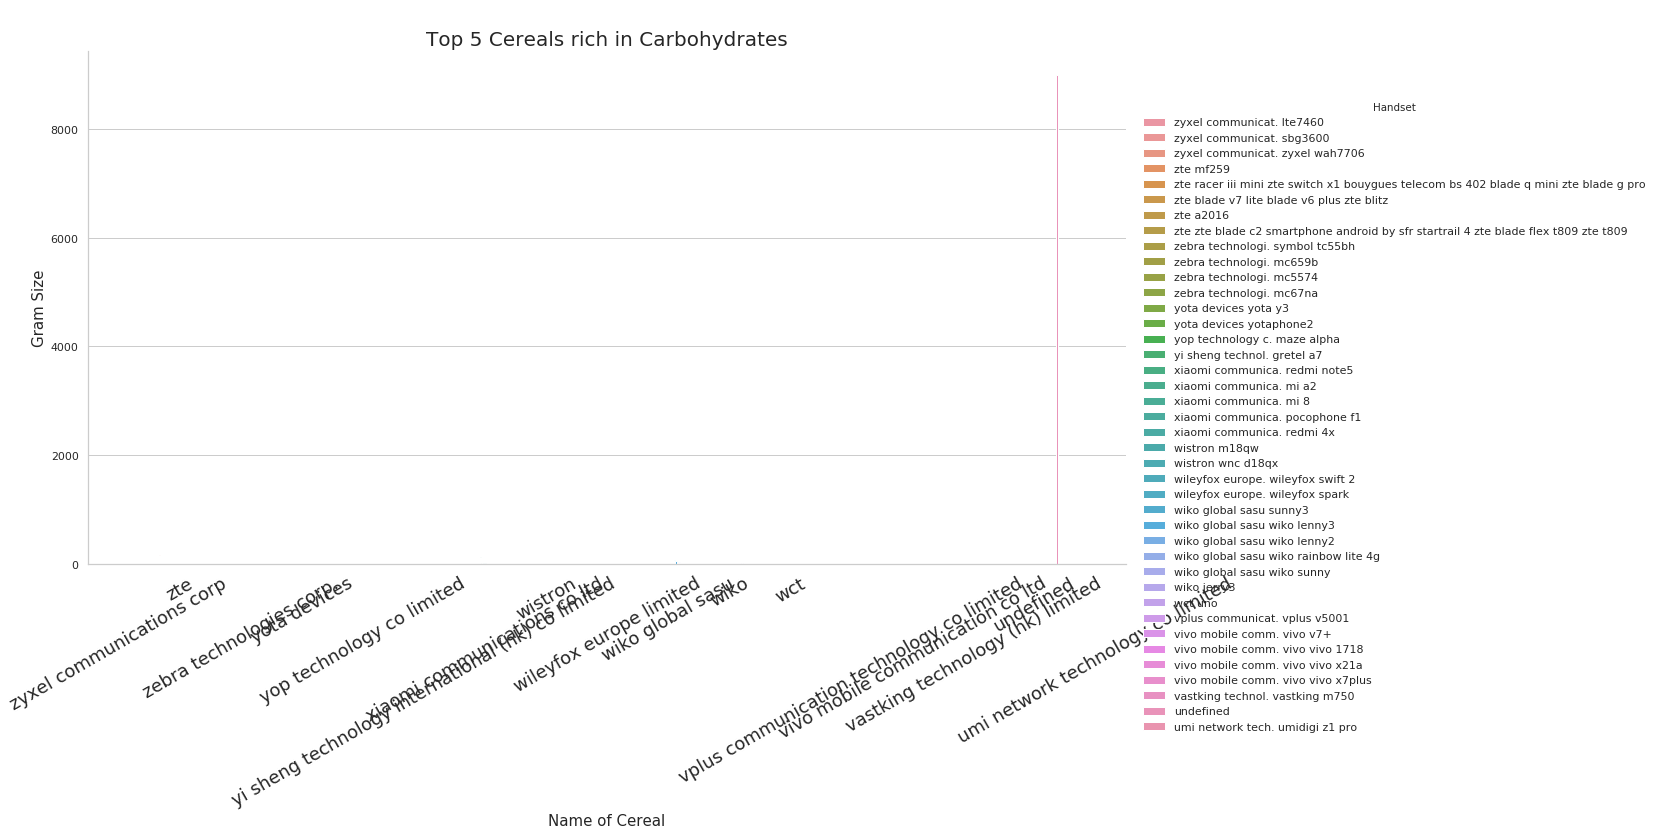

In [617]:
sns.set(style="whitegrid")
plot = sns.catplot(x='Manufacturer', y='count',hue = 'Handset',  data=top5Hands_man.iloc[0:40,0:3],
           aspect=2, kind='bar', height=8), #palette=["#001C7F", "#B1400D", '#12711C'])

plt.title('Top 5 Cereals rich in Carbohydrates', fontsize=20)
plt.xticks(rotation=30, fontsize=18)
plt.xlabel('Name of Cereal', fontsize=15)
plt.ylabel('Gram Size', fontsize=15)
# plot.despine(left=True)
plt.savefig(fname='visuals/top5Hands_man.png', format='png')
plt.show()

- Observation

> From the above we can deduce the folowing:

    1. Smart Phones are the most popularly used phones 
    
    2. Huawei phone specifically brand (_Huawei B528S-23A_) have the largest purchase
    
    3. Apple phone brands is the most popular (and possibly have the highest market share)

<a id="r2"></a>

#### Research Question 2

- User Behaviour in xDR sessions
 
     - What inisghts can be gooten from user behaviour accross the xDR sessions (Data Channel)

#### In answering the question above, we would focus on the following user aggreagations

aggregate per user the following information in the column:

   1. number of xDR sessions
    
   2. session duration
    
   3. the total download (DL) and upload (UL) data
    
   4. the total data volume (in Bytes) during this session for each application

1. number of XDR sessions  per user

In [618]:
data2.bearer_id.value_counts()

                        991
13042425979269199872     16
13042425965944199168     10
13042425974582800384      9
13042425978774599680      9
                       ... 
7277825667259140096       1
7349883251202240512       1
13042425971694100480      1
7349883251747399680       1
13114483550170300416      1
Name: bearer_id, Length: 134709, dtype: int64

> There are empty rows in our columns, let's confirm this

In [619]:
"" in data2.bearer_id.unique().tolist()

True

> This might affect our reporting, so let's drop them

In [620]:
bearers = data.query('bearer_id == "" ')

In [621]:
true_bearers = data.drop(bearers.index, axis=0) 

> Test

In [622]:
"" in true_bearers.bearer_id.unique().tolist()

False

In [623]:
all_xDR_sessions = true_bearers.groupby('bearer_id')['bearer_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

In [624]:
all_xDR_sessions

,bearer_id,count
29837,13042425979269199872,16
14584,13042425965944199168,10
28047,13042425978774599680,9
20367,13042425972278300672,9
30195,13042425981873399808,9
...,...,...
50114,13114483565776900096,1
50113,13114483565775900672,1
50112,13114483565775499264,1
50111,13114483565775400960,1


Non graphical univariate analysis

In [625]:
xDR_stats = all_xDR_sessions.describe().reset_index()

In [626]:
xDR_stats

,index,count
0,count,134708.000000
1,mean,1.106170
2,std,0.385199
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,1.000000
7,max,16.000000


In [627]:
xDR_stats.rename(columns={'index':'xDR_statistics', 'count':'value'}, inplace=True)

In [628]:
xDR_stats

,xDR_statistics,value
0,count,134708.000000
1,mean,1.106170
2,std,0.385199
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,1.000000
7,max,16.000000


#### Interpretation

- From the above statistics table, we have `134708` unique users - this signifies the proportion of Tellco Market Share in the telecommunications industry

- The mean of `1` signifies the average number of Data Sessions by most user is 1

- The minimum number of seesions by users is `1` while the maximum number of seesion is `16`

- A value of `1` across the first 3 quartiles, tells us that most of Tellco users have one data session on thier platform

Graphical Univariate Analysis

histrogam distribution

In [629]:
# from scipy.stats import norm
# bins = pd.qcut(all_xDR_sessions['count'], q=[0,.25, .50, .75], duplicates='drop')
# bins

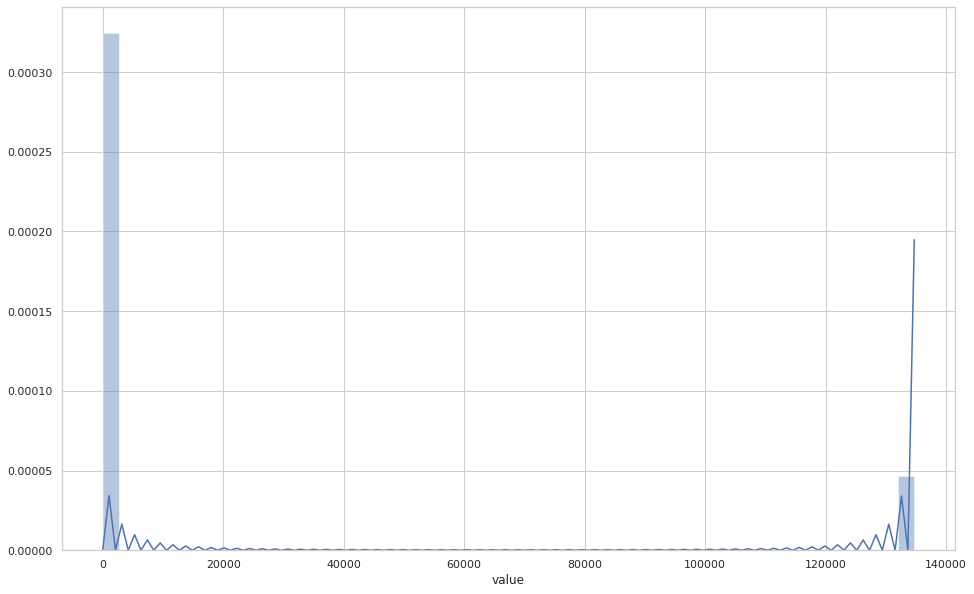

In [630]:
plt.subplots(figsize=(16, 10))
sns.distplot(xDR_stats.value, hist=True)

> The plot above doesn't seem weel scaled, let's try to normalize it with the z-score

<!-- Graphical Analysis -->

In [631]:
# cols = list(numeric_data.columns)
# outliers = pd.DataFrame()
# #now iterate over the remaining columns and create a new zscore column
# for col in cols:
#     col_zscore = col + '_zscore'
xDR_stats_z = (xDR_stats.value - xDR_stats.value.mean())/xDR_stats.value.std(ddof=0)

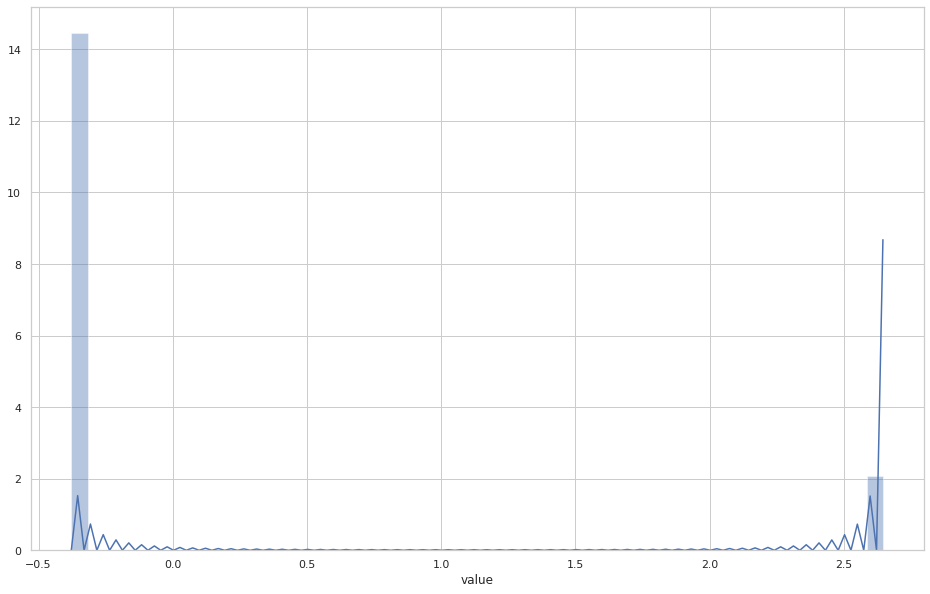

In [632]:
plt.subplots(figsize=(16, 10))
sns.distplot((xDR_stats_z), hist=True)

> Let's try using numpy log funciton to transform 

In [633]:
xDR_stats_log = np.log(xDR_stats.value)

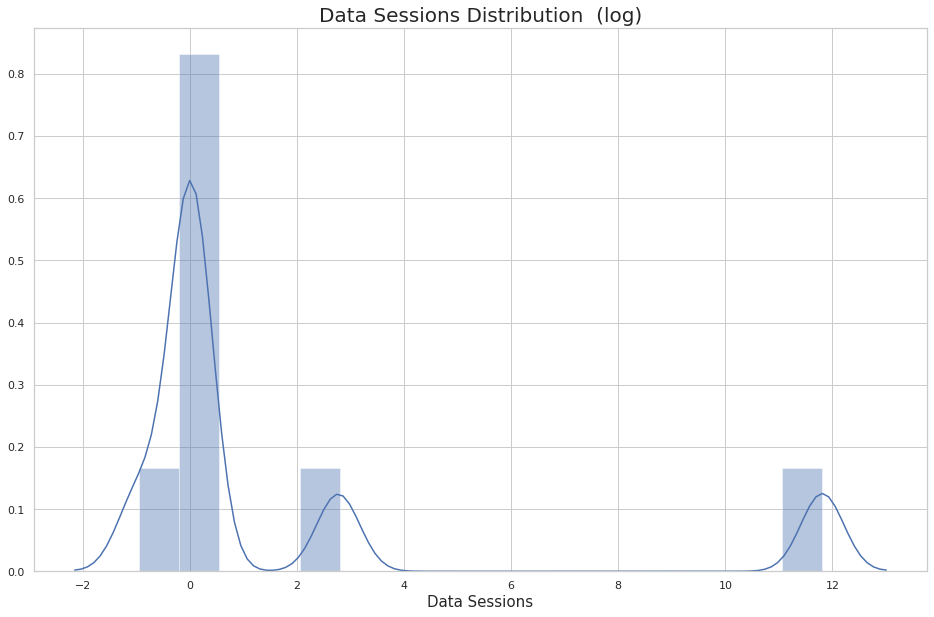

In [634]:
plt.subplots(figsize=(16, 10))
sns.distplot((xDR_stats_log), hist=True)
plt.title('Data Sessions Distribution  (log)', fontsize=20)
plt.xlabel('Data Sessions', fontsize=15)
plt.savefig('visuals/xDRdist.png', format='png')
plt.show()

Visuallizing, the barplot might be quite too busy on the chart.

Hence we would use visualize the top 10 xDR sessions

In [635]:
top_xDr = xDR_sessions.head(10)

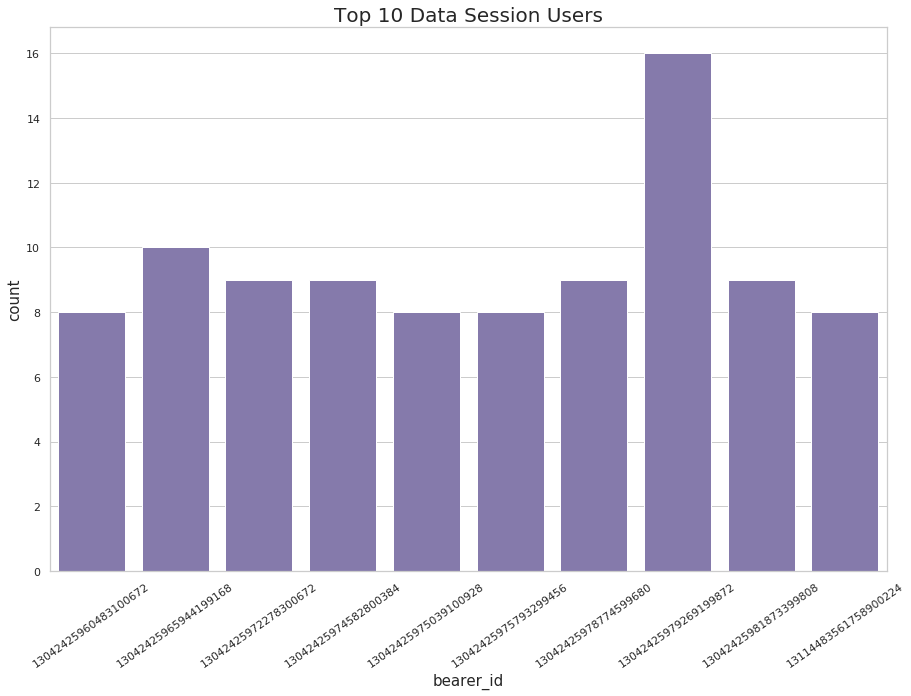

In [636]:
plt.subplots(figsize=(15, 10))
plt.xticks(rotation=35)
plt.xlabel('bearer id', fontsize=15)
plt.ylabel('xDR Sessions',fontsize=15)
plt.title('Top 10 Data Session Users', fontsize=20)
sns.barplot(x='bearer_id', y='count', data=top_xDr, color='m')
plt.savefig('visuals/topxDRusers.png', format='png')
plt.show()

#### Observations
> From the above, we can deduce the that most of the top data users, use data sessions within the range of 8-10

2. session duration

In [637]:
session_duration = true_bearers.groupby('bearer_id')['dur___ms__1'].sum().reset_index(name='time_spent').sort_values(by='time_spent', ascending=False)
# true_bearers['dur___ms__1']

In [638]:
session_duration

,bearer_id,time_spent
46452,13114483561758900224,5.659737e+09
20128,13042425972205000704,4.838430e+09
29039,13042425978965499904,3.990249e+09
26249,13042425975793299456,3.667448e+09
30195,13042425981873399808,2.863472e+09
...,...,...
74848,7277825656116110336,7.284802e+06
62268,6917537685489510400,7.267018e+06
61210,6917537673690099712,7.258080e+06
61198,6917537669513839616,7.146574e+06


> To get an accurate description, we have to convert the vlaue in milliseconds to hours

In [639]:
session_duration['time_spent']=session_duration['time_spent'].apply(lambda x: x/(1000*60*60)%24)

In [640]:
session_duration.rename(columns={'time_spent':'hours_spent'}, inplace=True)

In [641]:
session_duration

,bearer_id,hours_spent
46452,13114483561758900224,12.149104
20128,13042425972205000704,0.008350
29039,13042425978965499904,4.402587
26249,13042425975793299456,10.735547
30195,13042425981873399808,3.408767
...,...,...
74848,7277825656116110336,2.023556
62268,6917537685489510400,2.018616
61210,6917537673690099712,2.016133
61198,6917537669513839616,1.985159


Non Graphical Univariate Analysis

In [642]:
sess_dur_stats = session_duration.describe().reset_index()

In [643]:
sess_dur_stats.rename(columns={'index':'session_duration_stats', 'time_spent':'value'}, inplace=True)

In [644]:
sess_dur_stats

,session_duration_stats,hours_spent
0,count,134708.000000
1,mean,12.901180
2,std,8.117882
3,min,0.000000
4,25%,5.698989
5,50%,12.650733
6,75%,21.095601
7,max,24.000000


> I will add sum of the hours to the stats table

In [645]:
sum_hours = pd.Series({'sum':session_duration.hours_spent.sum()}).reset_index(name='hours_spent')

In [646]:
sum_hours=sum_hours.rename(columns={'index':'session_duration_stats'})

In [647]:
sum_hours

,session_duration_stats,hours_spent
0,sum,1.737892e+06


In [648]:
sess_dur_stats=sess_dur_stats.append(sum_hours)

In [649]:
sess_dur_stats

,session_duration_stats,hours_spent
0,count,1.347080e+05
1,mean,1.290118e+01
2,std,8.117882e+00
3,min,0.000000e+00
4,25%,5.698989e+00
5,50%,1.265073e+01
6,75%,2.109560e+01
7,max,2.400000e+01
0,sum,1.737892e+06


####  Interpretation

> Total hours spent by all users in the data sessions is `1,737,892 hrs`

> Average hours spent by a user in the data seesion is `12.90118`, appx `13 hrs`

> The minimum number of hours spent by each user is `0 hours`.

>  This means there are users who have never subscribed to Tellco data before

> The maximum number of hours spent by each user is `0 hours`. 

> This means there are users who have never subscribed to Tellco data before

> Half of the users spends `12.6 hrs` on data 

Graphical Univariate Analysis

lets plot the distributuion of hours spent on data

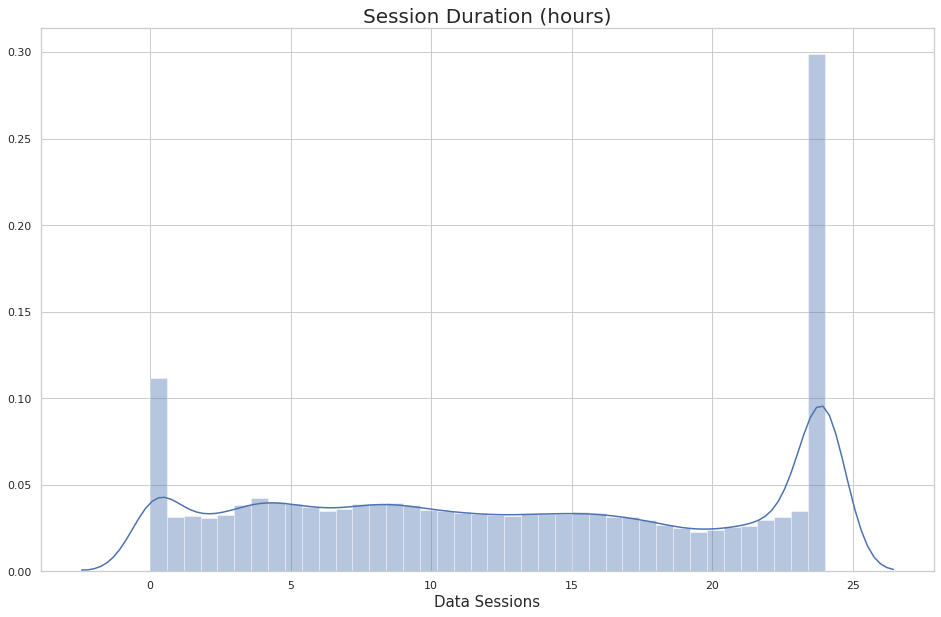

In [650]:
plt.subplots(figsize=(16, 10))
sns.distplot((session_duration['hours_spent']), hist=True)
plt.title('Session Duration (hours)', fontsize=20)
plt.xlabel('Data Sessions', fontsize=15)
plt.savefig('visuals/seesion_durationDist.png', format='png')
plt.show()

> We face the same issue of a non-normally ditributed data

#### Interpration

> generally the data is not normally distributed

3. the total download (DL) and upload (UL) data

In [651]:
data2

,bearer_id,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,handset_manufacturer,handset_type,social_media_dl__bytes_,social_media_ul__bytes_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,1.823653e+09,1.144710e+08,3.242301e+06,3.762400e+04,3.878700e+04,samsung,samsung galaxy a5 sm-a520f,1.545765e+06,24420.00000,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,1.365104e+09,1.144710e+08,3.242301e+06,1.680000e+02,3.560000e+03,samsung,samsung galaxy j5 (sm-j530),1.926113e+06,7165.00000,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,1.361763e+09,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,samsung,samsung galaxy a8 (2018),1.684053e+06,42224.00000,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,1.321510e+09,1.144710e+08,3.242301e+06,3.330000e+03,3.788200e+04,undefined,undefined,6.441210e+05,13372.00000,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,1.089009e+09,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,samsung,samsung sm-g390f,8.626000e+05,50188.00000,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,8.123076e+07,1.144710e+08,3.242301e+06,4.237600e+04,4.191500e+04,apple,apple iphone 8 plus (a1897),3.464974e+06,52091.00000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,9.797070e+07,1.144710e+08,3.242301e+06,1.726400e+04,1.675900e+04,apple,apple iphone se (a1723),2.344568e+06,7613.00000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,9.824953e+07,1.144710e+08,3.242301e+06,2.500300e+04,2.864000e+04,apple,apple iphone xs (a2097),1.245845e+06,14394.00000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,9.791063e+07,1.144710e+08,3.242301e+06,1.340500e+04,3.408800e+04,huawei,huawei fig-lx1,8.015470e+05,21562.00000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [652]:
data2['total_data_usage'] = data2.total_dl__bytes_ + data2.total_ul__bytes_

/home/patrick/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [653]:
data2['total_data_usage']

0         3.456294e+08
1         7.071854e+08
2         3.076910e+08
3         8.893527e+08
4         6.076814e+08
              ...     
149996    6.318041e+08
149997    7.057839e+08
149998    6.276986e+08
149999    4.015220e+08
150000    4.957646e+08
Name: total_data_usage, Length: 150001, dtype: float64

In [654]:
true_bearers=true_bearers.join(data2['total_data_usage'], how='inner')

In [655]:
data_usage = true_bearers.groupby('bearer_id')['total_data_usage'].sum().reset_index(name='total_data_usage').sort_values(by='total_data_usage', ascending=False)
# true_bearers['dur___ms__1']

In [656]:
data_usage

,bearer_id,total_data_usage
29837,13042425979269199872,6.990615e+09
20367,13042425972278300672,5.809100e+09
14584,13042425965944199168,4.970328e+09
25853,13042425975039100928,4.953519e+09
30195,13042425981873399808,4.575518e+09
...,...,...
128963,7349883261658779648,3.614993e+07
38101,13114483554777399296,3.399962e+07
33892,13114483551116199936,3.357584e+07
83637,7277825664644849664,3.324901e+07


Non Graphical Univariate Analysis

In [657]:
data_usage_stats = data_usage.describe().reset_index()

In [658]:
data_usage_stats

,index,total_data_usage
0,count,1.347080e+05
1,mean,5.484519e+08
2,std,3.199073e+08
3,min,2.895611e+07
4,25%,3.030796e+08
5,50%,5.304096e+08
6,75%,7.501322e+08
7,max,6.990615e+09


In [659]:
data_usage_stats.rename(columns={'index':'data_usage_stats', 'total_data_usage':'value'}, inplace=True)

In [660]:
data_usage_stats

,data_usage_stats,value
0,count,1.347080e+05
1,mean,5.484519e+08
2,std,3.199073e+08
3,min,2.895611e+07
4,25%,3.030796e+08
5,50%,5.304096e+08
6,75%,7.501322e+08
7,max,6.990615e+09


> I will add sum of the data usage to the stats table

In [661]:
sum_data = pd.Series({'sum':data_usage.total_data_usage.sum()}).reset_index(name='value')

In [662]:
sum_data

,index,value
0,sum,7.388086e+13


In [663]:
sum_data=sum_data.rename(columns={'index':'data_usage_stats'})

In [664]:
sum_data

,data_usage_stats,value
0,sum,7.388086e+13


In [665]:
data_usage_stats=data_usage_stats.append(sum_data)

In [666]:
data_usage_stats

,data_usage_stats,value
0,count,1.347080e+05
1,mean,5.484519e+08
2,std,3.199073e+08
3,min,2.895611e+07
4,25%,3.030796e+08
5,50%,5.304096e+08
6,75%,7.501322e+08
7,max,6.990615e+09
0,sum,7.388086e+13


####  Interpretation

> Total hamount of data spent by all users in the data sessions is `73,880,860,000,00092 bytes`

> Average data spent by a user is `12.90118`, appx `548,451,900 bytes`

> The minimum number of hours spent by each user is `0 hours`.

>  This means there are users who have never subscribed to Tellco data before

> The maximum number of hours spent by each user is `0 hours`. 

> This means there are users who have never subscribed to Tellco data before

> Half of the users spends `12.6 hrs` on data 

Graphical Univariate Analysis

lets plot the distributuion of hours spent on data

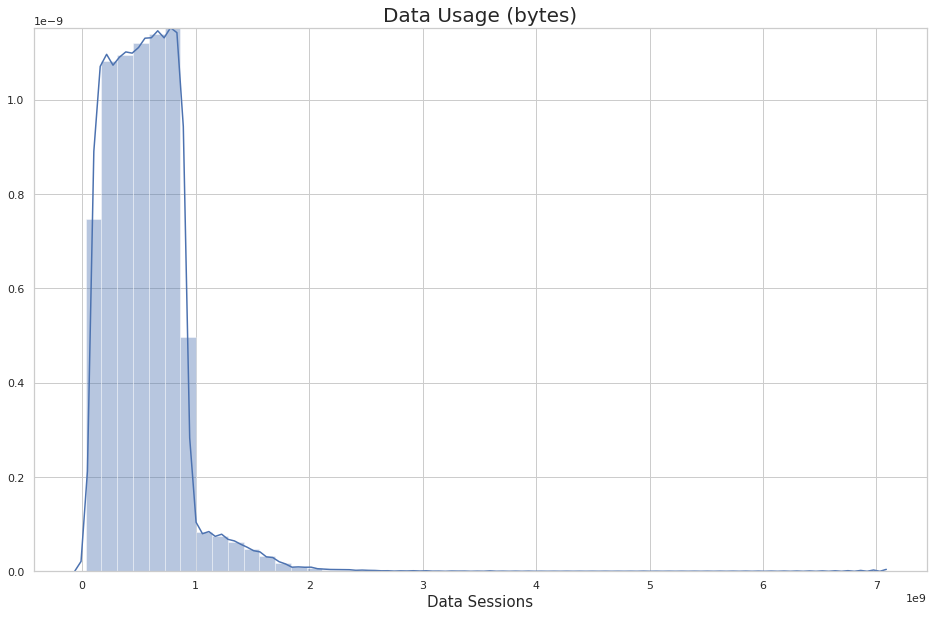

In [667]:
plt.subplots(figsize=(16, 10))
sns.distplot((data_usage['total_data_usage']), hist=True)
plt.title('Data Usage (bytes)', fontsize=20)
plt.xlabel('Data Sessions', fontsize=15)
plt.savefig('visuals/dataUsageDist.png', format='png')
plt.show()

#### Interpration

> Data usage is right skewed, which means we have less users who use below average data usage

4

In [668]:
to_app_data = data2[['social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_','total_data_usage' ]]

In [669]:
to_app_data

,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,google_ul__bytes_,email_dl__bytes_,email_ul__bytes_,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,total_data_usage
0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,3.456294e+08
1,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,7.071854e+08
2,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,3.076910e+08
3,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,8.893527e+08
4,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,6.318041e+08
149997,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.057839e+08
149998,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,6.276986e+08
149999,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,4.015220e+08


In [670]:
app_data = pd.DataFrame()

In [671]:
app_data['users'] = data2.bearer_id

In [672]:
app_data['social_media'] = to_app_data.social_media_dl__bytes_ + to_app_data.social_media_ul__bytes_

In [673]:
app_data['google'] = to_app_data.google_dl__bytes_ + to_app_data.gaming_ul__bytes_

In [674]:
app_data['email'] = to_app_data.email_dl__bytes_ + to_app_data.email_ul__bytes_

In [675]:
app_data['youtube'] = to_app_data.youtube_dl__bytes_ + to_app_data.youtube_ul__bytes_

In [676]:
app_data['netflix'] = to_app_data.netflix_dl__bytes_ + to_app_data.netflix_ul__bytes_

In [677]:
app_data['gaming'] = to_app_data.gaming_dl__bytes_ + to_app_data.gaming_ul__bytes_

In [678]:
app_data

,users,social_media,google,email,youtube,netflix,gaming
0,13114483460844900352,1.570185e+06,1.597863e+07,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08
1,13114483482878900224,1.933278e+06,4.664633e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08
2,13114483484080500736,1.726277e+06,8.930685e+06,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08
3,13114483485442799616,6.574930e+05,1.987346e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08
4,13114483499480700928,9.127880e+05,9.778085e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08
...,...,...,...,...,...,...,...
149996,7277825670196679680,3.517065e+06,1.916481e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08
149997,7349883264234609664,2.352181e+06,6.964453e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08
149998,13114483573367300096,1.260239e+06,1.724521e+07,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08
149999,13114483573367300096,8.231090e+05,6.719248e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08


Non graphical univariate analyis

In [690]:
app_data_stats = app_data.iloc[:, 1:].describe()

In [691]:
app_data_stats

,social_media,google,email,youtube,netflix,gaming
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.828250e+06,1.403915e+07,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08
std,1.035646e+06,5.811980e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08
min,1.563000e+03,2.370800e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05
25%,9.322180e+05,9.774338e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08
50%,1.826471e+06,1.403358e+07,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08
75%,2.727487e+06,1.831082e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08
max,3.650861e+06,2.795925e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08


5

In [679]:
vals = [app_data.social_media.sum(), app_data.google.sum(), app_data.email.sum(), 
          app_data.youtube.sum(), app_data.netflix.sum(), app_data.gaming.sum()]

In [680]:
vals

[274239359454.20804,
 2105886648653.73,
 338867605596.30994,
 3396545039272.6387,
 3394313609363.5386,
 64550395439016.7]

In [682]:
total_app_data = pd.DataFrame(columns=app_data.columns.to_list()[1:],data=[vals])

In [683]:
total_app_data=total_app_data.transpose().reset_index().rename(columns={'index':'application', 0:'total_data'})

In [684]:
total_app_data = total_app_data.sort_values(by='total_data', ascending=False)
total_app_data

,application,total_data
5,gaming,6.455040e+13
3,youtube,3.396545e+12
4,netflix,3.394314e+12
1,google,2.105887e+12
2,email,3.388676e+11
0,social_media,2.742394e+11


Application data

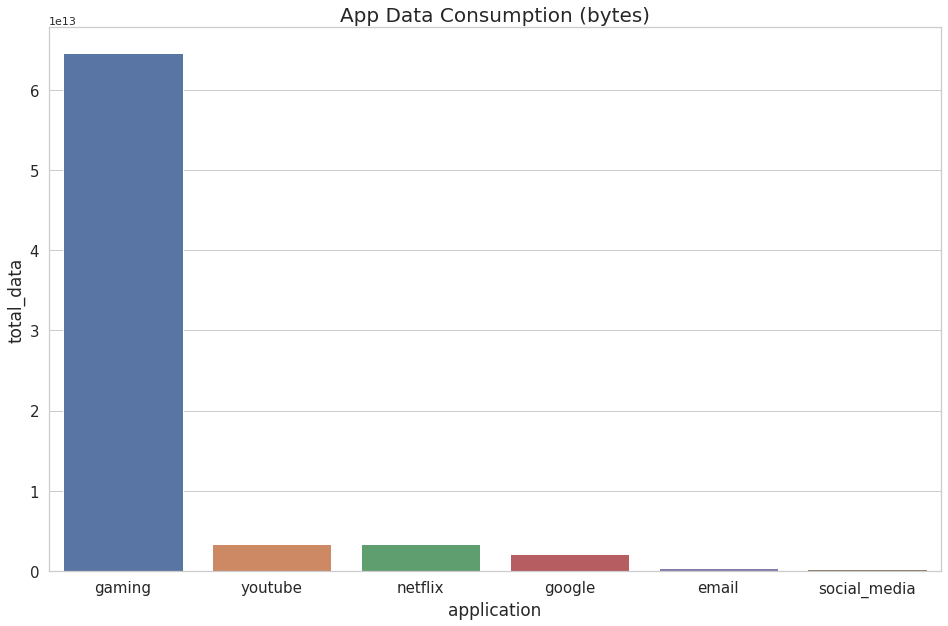

In [685]:
plt.subplots(figsize=(16,10))
plt.title('App Data Consumption (bytes)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Application', fontsize=17)
plt.ylabel('Data Use (bytes)', fontsize=17)
sns.barplot(data=total_app_data, x='application', y='total_data')
plt.savefig(format='png', fname='visuals/appData.png')
plt.show()

<a id='r3'></a>

#### Research Question 3